In [75]:
import matplotlib.pyplot as plt
from numpy import arange
from numpy.random import normal, exponential, uniform
from scipy import stats
import pandas as pd
from collections import Counter
from math import *

In [122]:
# вычисление значений
V = 15
a = (-1)**V*0.1*V
sigma = 0.01*V+1
lam = 3+(-1)**V*0.01*V
a_uni = (-1)**V*0.05*V
b = a_uni+3
size = 200
m_Sterdjes = int(1+log(size, 2)//1)
print('a =', a, '\nsigma =', sigma, '\nlam =', lam, '\na_uni =', a_uni,
      '\nb =', b,'\nsize =', size, '\nm_Sterdjes =', m_Sterdjes)

a = -1.5 
sigma = 1.15 
lam = 2.85 
a_uni = -0.75 
b = 2.25 
size = 200 
m_Sterdjes = 8


In [123]:
# создание датафрейма
def df_create(Xk, Nk, Wk):
    df = pd.DataFrame(Xk, columns=['Xk'])
    df['Nk'] = Nk
    df['Wk'] = Wk
    return df

# теоретические величины

In [155]:
def phi(x, a, sigma): 
    return (1 + erf((x - a) / sigma / sqrt(2))) / 2

# вероятность попадания в i-ый интервал для нормального распределения
def normal_teor_probability(data, a, sigma, m_Sterdjes, len_of_interval):
    probabilityes = []
    intervals = []
    summ = 0
    for i in range(m_Sterdjes+1):
        intervals.append(data[0]+len_of_interval*i)
    
    print()
    for i in range(len(intervals)-1):
        probabilityes.append(round(phi(intervals[i+1], a, sigma**2)-phi(intervals[i], a, sigma**2), 5))
        print(i+1, probabilityes[i]) 
        summ += probabilityes[i]
    print('sum =', summ) 
    
    return probabilityes
    
    
#Function for the CDF of the exponential distribution
def CDFExponential(lam,x): #lamb = lambda
    if x<=0:
        cdf=0
    else:
        cdf=1-exp(-lam*x)
    return cdf
    
# вероятность попадания в i-ый интервал для показательного распределения
def exp_teor_probability(data, lam, m_Sterdjes, len_of_interval):
    probabilityes = []
    intervals = []
    summ = 0
    for i in range(m_Sterdjes+1):
        intervals.append(data[0]+len_of_interval*i)
    
    print()
    for i in range(len(intervals)-1):
        probabilityes.append(round(CDFExponential(lam,intervals[i+1])-CDFExponential(lam,intervals[i]), 5))
        print(i+1, probabilityes[i])
        summ += probabilityes[i]
    print('sum =', summ)    
    
    return probabilityes
        
   
        
# вероятность попадания в i-ый интервал для равномерного распределения
def uni_teor_probability(data, a, b, m_Sterdjes, len_of_interval):
    probabilityes = []
    intervals = []
    summ = 0
    for i in range(m_Sterdjes+1):
        intervals.append(data[0]+len_of_interval*i)
        
    print()
    for i in range(len(intervals)-1):
        probabilityes.append(round(stats.uniform.cdf(intervals[i+1], a, b)-stats.uniform.cdf(intervals[i], a, b), 5))
        print(i+1, probabilityes[i])
        summ += probabilityes[i]
    print('sum =', summ) 
    
    return probabilityes
    

In [15]:
def print_normal_teor():
    print('NORMAL teoreric')
    print('expected value =', a)
    print('dispersion =', (sigma**2)**2)
    print('quadratic deviation =', sigma**2)
    print('fashion =', a)
    print('median =', a)
    print('asymmetry =', 0)
    print('kurtosis =', 0)
    
def print_exp_teor():
    print('EXPONENTIAL teoreric')
    print('expected value =', lam**(-1))
    print('dispersion =', lam**(-2))
    print('quadratic deviation =', lam**(-1))
    print('fashion =', 0)
    print('median =', log1p(1)/lam)
    print('asymmetry =', 2)
    print('kurtosis =', 6)
    
def print_uni_teor():
    print('UNIFORM teoreric')
    print('expected value =', (a_uni + b) / 2)
    print('dispersion =', (b - a_uni)**2 / 12)
    print('quadratic deviation =', (b - a_uni) / 2*sqrt(3))
    print('fashion =', (a_uni + b) / 2)
    print('median =', (a_uni + b) / 2)
    print('asymmetry =', 0)
    print('kurtosis =', -6/5)

In [16]:
print_normal_teor
print_exp_teor
print_uni_teor

<function __main__.print_uni_teor()>

# методы

### вычисление

In [17]:
# распределение элементов по интервалам 
def make_elems_in_intervals(data, len_of_interval):
    elem_in_intervals = [
        [],
        [],
        [],
        [],
        [],
        [],
        [],
        [],
    ]
    intervals = [
        data[0], 
        data[0]+len_of_interval, 
        data[0]+len_of_interval*2,
        data[0]+len_of_interval*3,
        data[0]+len_of_interval*4,
        data[0]+len_of_interval*5,
        data[0]+len_of_interval*6,
        data[0]+len_of_interval*7,
        data[0]+len_of_interval*8
    ]
    round(intervals[0], 5)
    for i in range(len(intervals)-1):
        round(intervals[i+1], 5)
        print(intervals[i], intervals[i+1])
    
    for i in range(len(data)-1):
        if intervals[0] <= data[i] <= intervals[1]:
            elem_in_intervals[0].append(data[i])
        elif intervals[1] < data[i] <= intervals[2]:
            elem_in_intervals[1].append(data[i])
        elif intervals[2] < data[i] <= intervals[3]:
            elem_in_intervals[2].append(data[i])
        elif intervals[3] < data[i] <= intervals[4]:
            elem_in_intervals[3].append(data[i])
        elif intervals[4] < data[i] <= intervals[5]:
            elem_in_intervals[4].append(data[i])
        elif intervals[5] < data[i] <= intervals[6]:
            elem_in_intervals[5].append(data[i])
        elif intervals[6] < data[i] <= intervals[7]:
            elem_in_intervals[6].append(data[i])
        elif intervals[7] < data[i] <= intervals[8]:
            elem_in_intervals[7].append(data[i])
            
    elem_in_intervals[7].append(data[-1])
    return elem_in_intervals

In [18]:
# растояние от первого до последнего элемента 
def len_of_all(sort_data):
    len_of_all_value = round(sort_data[size-1] - sort_data[0], 5)
    return len_of_all_value

# длина интервала
def len_of_interval_i(sort_data, m):
    len_of_all_value = len_of_all(sort_data)
    len_of_interval = round(len_of_all_value/m, 5)
    return len_of_interval

In [19]:
# число значений попавщих в i-ый интервал
def count_elems(elems_in_intervals):
    Nk = []
#     summ = 0
    for i in range(len(elems_in_intervals)):
        Nk.append(len(elems_in_intervals[i]))
#         summ = Nk[i] + summ
#     Nk.append(summ)
    return Nk

# относительная частота попадания в i-ый интервал
def relative_frequency(Nk, size):
    Wk = []
#     summ = 0 
    for i in range(len(Nk)):
        Wk.append(Nk[i]/size)
#         summ = Wk[i] + summ
#     Wk.append(summ)
    return Wk

# середина интервалов
def intervals_mid(data, len_of_interval):
    intervals = [
        data[0], 
        data[0]+len_of_interval, 
        data[0]+len_of_interval*2,
        data[0]+len_of_interval*3,
        data[0]+len_of_interval*4,
        data[0]+len_of_interval*5,
        data[0]+len_of_interval*6,
        data[0]+len_of_interval*7,
        data[0]+len_of_interval*8
    ]
    Xk = []
    for i in range(len(intervals)-1):
        Xk.append( (intervals[i]+intervals[i+1])/2 )
        
    return Xk

In [20]:
# выборочное среднее
def sample_mean(df):
    summ = 0
    for i in range(len(df)):
        summ = summ + df['Xk'][i]*df['Wk'][i]
    return summ

# выборочная дисперсия
def sample_dispersion_with_Shepard(df, len_of_interval):
    sample_mean_value = sample_mean(df)
    summ = 0
    for i in range(len(df)):
        summ = summ + ( (df['Xk'][i]-sample_mean_value)**2 * df['Wk'][i] - (len_of_interval**2 / 12) )
    return summ

# выборочное среднее квадратическое отклонение
def sample_quadratic_deviation(df, len_of_interval):
    return (sqrt(sample_dispersion_with_Shepard(df, len_of_interval)))

# нахождение номера модального интервала
def search_fashion_interval(df, max_N):
    for i in range(len(df)):
        if df['Nk'][i] == max_N:
            return i

# выборочная мода
def sample_fashion(df, first, len_of_interval):  
    max_N = max(df['Nk'])
    num = search_fashion_interval(df, max_N)
    a = first + len_of_interval*num
    if num==0:
        M = a + len_of_interval*(df['Wk'][num])/(2*df['Wk'][num]-df['Wk'][num+1])
    elif num==len(df)-1:
        M = a + len_of_interval*(df['Wk'][num]-df['Wk'][num-1])/(2*df['Wk'][num]-df['Wk'][num-1])
    else:
        M = a + len_of_interval*(df['Wk'][num]-df['Wk'][num-1])/(2*df['Wk'][num]-df['Wk'][num-1]-df['Wk'][num+1])
    return M

# выборочная медиана
def sample_median(df, first, len_of_interval):
    max_N = max(df['Nk'])
    num = search_fashion_interval(df, max_N)
    summ = 0 
    for i in range(num):
        summ = summ + df['Wk'][i]
    if summ == 0.5:
        M = first + len_of_interval*(num+1)
        return M
    else: 
        summ = summ - df['Wk'][num]
        a = first + len_of_interval*num
        M = a + len_of_interval/df['Wk'][num] * (0.5 - summ)
        return M
    
# выборочниый момент К-го порядка
def sample_moment_k(df, k):
    summ = 0 
    for i in range(len(df)):
        summ = summ + ( df['Xk'][i]**k * df['Wk'][i] )
    return summ

# выборочный центральный момент k-ого порядка
def sample_centr_moment_k(df, k):
    summ = 0
    sm = sample_mean(df)
    for i in range(len(df)):
        summ = summ + ((df['Xk'][i]-sm)**k)*df['Wk'][i]
    return summ

# выборочный коэффициент асимметрии
def sample_asymmetry_coef(df, len_of_interval):
    return (sample_centr_moment_k(df, 3) / sample_dispersion_with_Shepard(df, len_of_interval)**3)

# выборочный коэффициент эксцесса
def sample_kurtosis_coef(df, len_of_interval):
    return ((sample_centr_moment_k(df, 4) / sample_dispersion_with_Shepard(df, len_of_interval)**4) - 3)

In [131]:
def print_all(df, first, len_of_interval): 
    print('выборочное среднее =', round(sample_mean(df), 5))
    print('выборочная дисперсия =', round(sample_dispersion_with_Shepard(df, len_of_interval), 5))
    print('выборочное среднее квадратическое отклонение =', round(sample_quadratic_deviation(df, len_of_interval), 5))
    print('выборочная мода =', round(sample_fashion(df, first, len_of_interval), 5))
    print('выборочная медиана =', round(sample_median(df, first, len_of_interval), 5))
    print('выборочниый момент 2-го порядка =', round(sample_moment_k(df, 2), 5))
    print('выборочный центральный момент 2-ого порядка =', round(sample_centr_moment_k(df, 2), 5))
    print('выборочный коэффициент асимметрии =', round(sample_asymmetry_coef(df, len_of_interval),5))
    print('выборочный коэффициент эксцесса =', round(sample_kurtosis_coef(df, len_of_interval),5))

### построение

In [22]:
# график эмпир. ф-ии распр.
def plot_emperic(sort_data, size):  
    arr_x = sort_data
    arr_y = []
        
    plt.figure(figsize=(10, 8), dpi=200)
    for i in range(len(sort_data)-1):
        arr_y.append( (i+1)/size )
        plt.plot([arr_x[i],arr_x[i+1]], [arr_y[i], arr_y[i]])
    
    plt.plot([arr_x[0]-0.3,arr_x[0]], [0,0], color='blue')
    plt.plot([arr_x[-1],arr_x[-1]+0.3], [1,1], color='blue')
    plt.yticks(arange(0, 1.1, step=0.1))
    plt.grid(True)   
    
def plot_hist(df, len_of_interval):
    width = len_of_interval
    plt.figure(figsize=(10, 8), dpi=200)
    plt.bar(df['Xk'], df['Wk']/width, width, color='orange', edgecolor='dodgerblue', linewidth=0.6)
    plt.xticks(df_normal['Xk'])
    plt.show()

# нормальное распределение

In [23]:
# data_normal = stats.norm.rvs(a, sigma**2, 200)
# for i in range(size): 
#     data_normal[i] = round(data_normal[i], 5)
# print(list(data_normal))

data_normal = [-0.70173, -0.05719, -1.65308, -1.01296, -1.99263, -1.2209, -0.98839, -0.8808, -2.33442, -3.61558, 
 0.52413, -2.69514, -2.92026, -2.05086, -4.28943, -0.56916, -1.64454, 0.26896, -1.42977, -2.15677, 
 -1.60152, -1.19808, -1.92039, -1.85156, -4.81043, -0.85691, -3.61121, -2.04912, -3.96904, -1.40656,
 -0.56747, -2.31204, -1.67626, -2.36936, -4.21348, -1.26742, -4.01428, -2.90302, 0.40474, -1.46881,
 -2.68777, 0.8623, -0.73874, -3.47128, 0.78598, -1.84781, -1.96633, -4.76334, -3.0808, -0.25353,
 -1.34837, -0.85369, -2.31223, -3.92839, -5.8342, -4.79146, -2.37577, -2.14428, 0.24358, 0.4006,
 -2.01923, -1.76944, -4.24736, -1.25184, -3.25124, -3.01075, -2.65712, -2.81276, -0.02107, -3.64766,
 -0.16122, -2.0712, 0.35845, 0.39934, -0.91342, -1.10884, -3.05746, -0.96038, -0.60832, -0.65228,
 -1.29053, -0.37557, -2.76593, -0.80463, 0.95699, 3.72364, 0.61849, -1.3926, -0.1388, -2.76233,
 -2.10733, -0.17511, -2.72465, 0.96748, 2.29233, -3.26791, -0.87422, 0.59608, -2.45822, -3.07546,
 0.66913, -4.47839, -1.27483, -2.86937, -3.36879, -3.25012, -3.7023, -2.34538, 1.46169, -0.07601, 
 -0.168, -3.14228, -3.89163, -4.44166, -1.77463, -4.72523, -3.39096, 1.53596, -2.44595, -3.06224,
 -4.249, -2.65346, -1.62075, 0.17642, -5.73048, -0.82383, -0.9719, -1.39183, -0.63895, -2.62225, 
 -0.67351, -1.01372, -1.00875, -2.50627, -0.82341, -1.48967, 1.31873, -0.22601, -0.17914, -2.27375,
 -1.18683, -3.24379, -0.02634, -1.93927, 0.80787, -1.34957, -2.71346, -0.41952, -3.50022, -0.54566, 
 0.4447, -2.92676, 1.44405, -1.07292, -5.59311, 0.60916, 0.57346, -2.83553, -0.4262, -3.4484,
 -5.3389, 2.47931, 0.8146, -3.25974, 1.50226, -0.30881, -2.32515, 1.09816, -2.96827, 0.25471,
 -1.37835, -0.98979, 1.07481, -5.29052, -1.36842, -3.41074, -2.10083, 0.68326, -2.10111, -2.39642,
 0.27172, -2.49083, -2.3957, -2.00104, -1.49567, -1.66092, 0.60002, -2.41492, -2.67075, -0.91565,
 0.4624, 0.18403, -1.36015, 1.92313, 0.57428, -3.99065, -1.61141, -0.98953, -2.66193, -1.40212]



In [127]:
sort_data_normal = sorted(data_normal)
for i in range(0,len(sort_data_normal),10):
    print(sort_data_normal[i], sort_data_normal[i+1], 
          sort_data_normal[i+2], sort_data_normal[i+3], 
          sort_data_normal[i+4], sort_data_normal[i+5], 
          sort_data_normal[i+6], sort_data_normal[i+7], 
          sort_data_normal[i+8], sort_data_normal[i+9])

-5.8342 -5.73048 -5.59311 -5.3389 -5.29052 -4.81043 -4.79146 -4.76334 -4.72523 -4.47839
-4.44166 -4.28943 -4.249 -4.24736 -4.21348 -4.01428 -3.99065 -3.96904 -3.92839 -3.89163
-3.7023 -3.64766 -3.61558 -3.61121 -3.50022 -3.47128 -3.4484 -3.41074 -3.39096 -3.36879
-3.26791 -3.25974 -3.25124 -3.25012 -3.24379 -3.14228 -3.0808 -3.07546 -3.06224 -3.05746
-3.01075 -2.96827 -2.92676 -2.92026 -2.90302 -2.86937 -2.83553 -2.81276 -2.76593 -2.76233
-2.72465 -2.71346 -2.69514 -2.68777 -2.67075 -2.66193 -2.65712 -2.65346 -2.62225 -2.50627
-2.49083 -2.45822 -2.44595 -2.41492 -2.39642 -2.3957 -2.37577 -2.36936 -2.34538 -2.33442
-2.32515 -2.31223 -2.31204 -2.27375 -2.15677 -2.14428 -2.10733 -2.10111 -2.10083 -2.0712
-2.05086 -2.04912 -2.01923 -2.00104 -1.99263 -1.96633 -1.93927 -1.92039 -1.85156 -1.84781
-1.77463 -1.76944 -1.67626 -1.66092 -1.65308 -1.64454 -1.62075 -1.61141 -1.60152 -1.49567
-1.48967 -1.46881 -1.42977 -1.40656 -1.40212 -1.3926 -1.39183 -1.37835 -1.36842 -1.36015
-1.34957 -1.34837 -1

In [25]:
len_of_interval_normal = len_of_interval_i(sort_data_normal, m_Sterdjes)
print('d =', len_of_interval_normal)

d = 1.19473


In [26]:
elems_normal = make_elems_in_intervals(sort_data_normal, len_of_interval_normal)
for i in range(len(elems_normal)):
    print(elems_normal[i])

-5.8342 -4.63947
-4.63947 -3.44474
-3.44474 -2.2500099999999996
-2.2500099999999996 -1.0552799999999998
-1.0552799999999998 0.13945000000000007
0.13945000000000007 1.3341800000000008
1.3341800000000008 2.5289100000000007
2.5289100000000007 3.7236400000000005
[-5.8342, -5.73048, -5.59311, -5.3389, -5.29052, -4.81043, -4.79146, -4.76334, -4.72523]
[-4.47839, -4.44166, -4.28943, -4.249, -4.24736, -4.21348, -4.01428, -3.99065, -3.96904, -3.92839, -3.89163, -3.7023, -3.64766, -3.61558, -3.61121, -3.50022, -3.47128, -3.4484]
[-3.41074, -3.39096, -3.36879, -3.26791, -3.25974, -3.25124, -3.25012, -3.24379, -3.14228, -3.0808, -3.07546, -3.06224, -3.05746, -3.01075, -2.96827, -2.92676, -2.92026, -2.90302, -2.86937, -2.83553, -2.81276, -2.76593, -2.76233, -2.72465, -2.71346, -2.69514, -2.68777, -2.67075, -2.66193, -2.65712, -2.65346, -2.62225, -2.50627, -2.49083, -2.45822, -2.44595, -2.41492, -2.39642, -2.3957, -2.37577, -2.36936, -2.34538, -2.33442, -2.32515, -2.31223, -2.31204, -2.27375]
[-2.15

In [27]:
Nk_normal = count_elems(elems_normal)
Nk_normal

[9, 18, 47, 47, 41, 30, 7, 1]

In [28]:
Wk_normal = relative_frequency(Nk_normal, size)
Wk_normal

[0.045, 0.09, 0.235, 0.235, 0.205, 0.15, 0.035, 0.005]

In [29]:
Xk_normal = intervals_mid(sort_data_normal, len_of_interval_normal)
Xk_normal

[-5.236835,
 -4.042105,
 -2.8473749999999995,
 -1.6526449999999997,
 -0.45791499999999985,
 0.7368150000000004,
 1.9315450000000007,
 3.1262750000000006]

In [30]:
df_normal = df_create(Xk_normal, Nk_normal, Wk_normal)
df_normal

,Xk,Nk,Wk
0,-5.236835,9,0.045
1,-4.042105,18,0.090
2,-2.847375,47,0.235
3,-1.652645,47,0.235
4,-0.457915,41,0.205
5,0.736815,30,0.150
6,1.931545,7,0.035
7,3.126275,1,0.005


In [31]:
summ = 0
for i in range(len(df_normal)):
    summ = summ + df_normal['Wk'][i]
summ

1.0

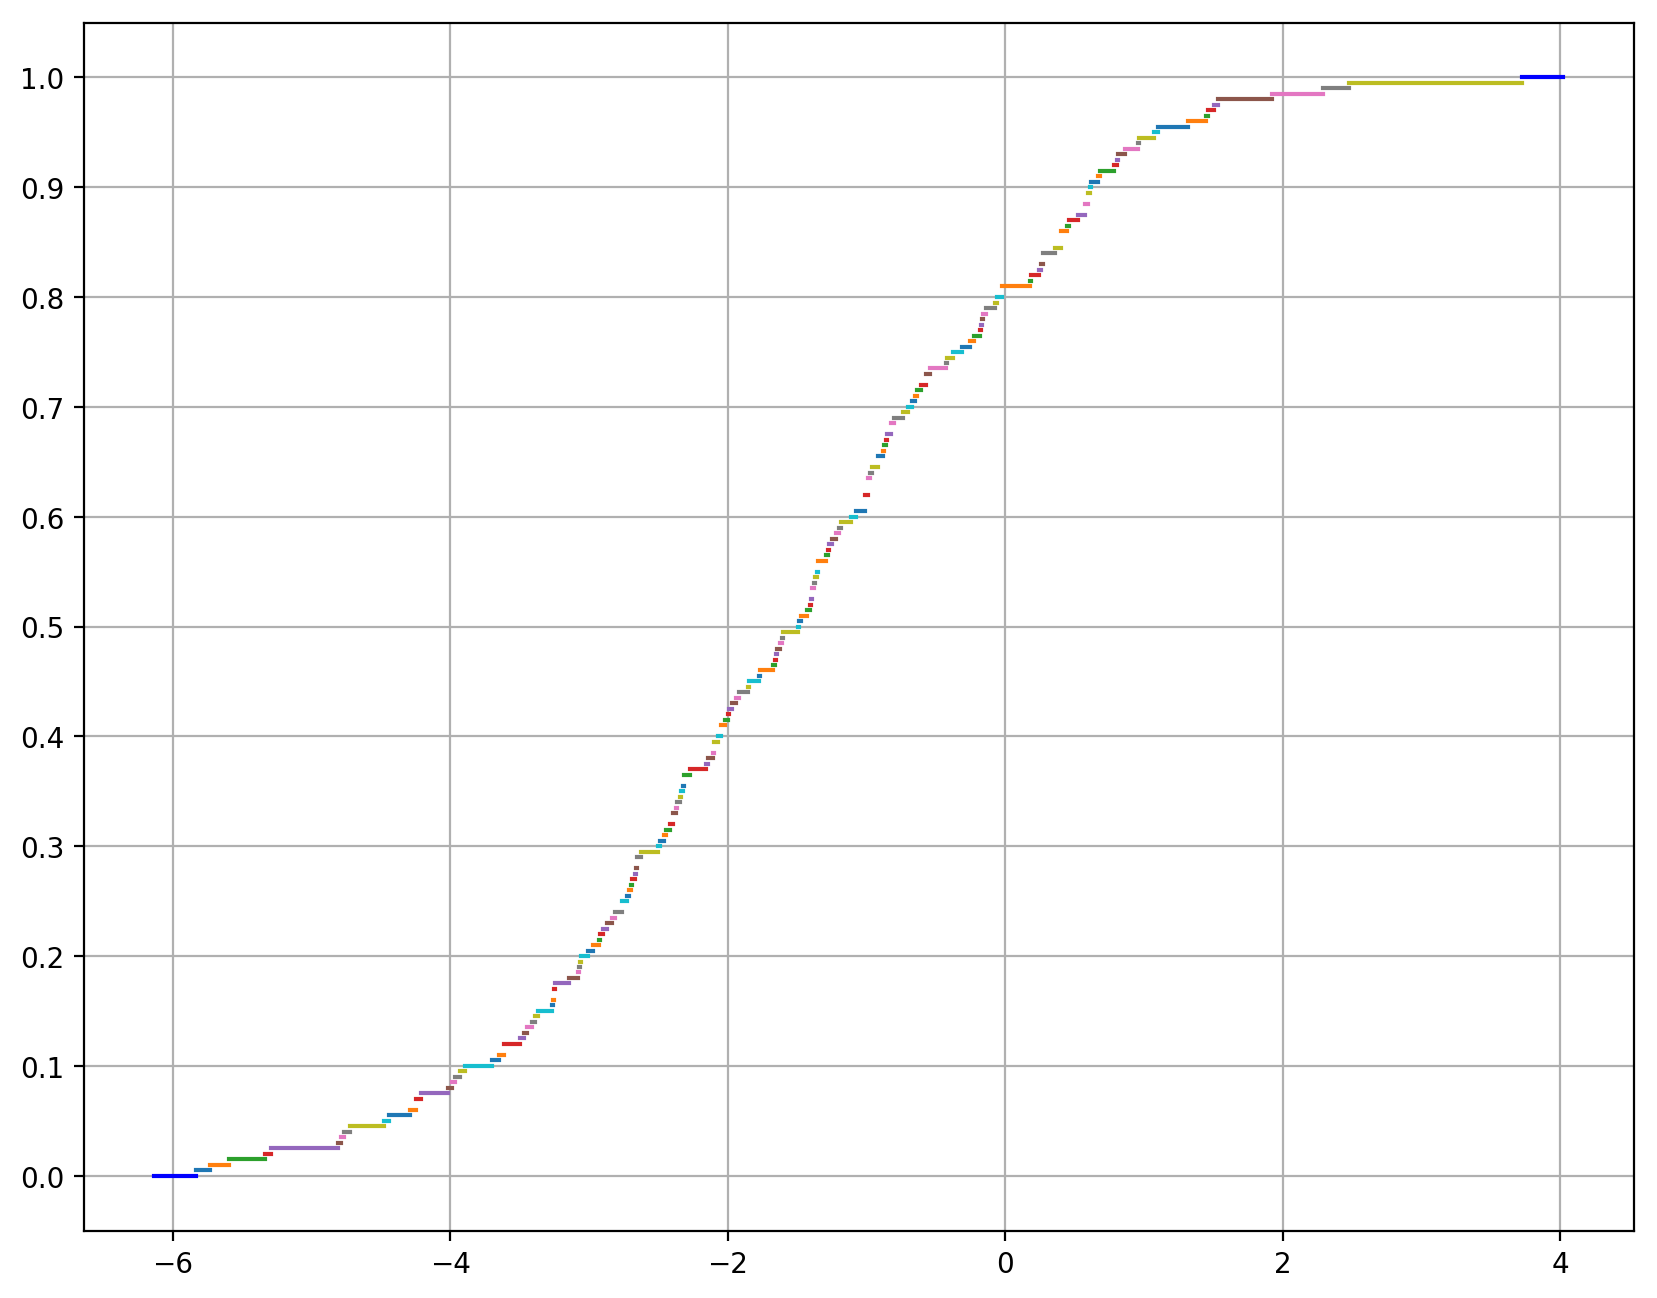

In [32]:
plot_emperic(sort_data_normal, size)

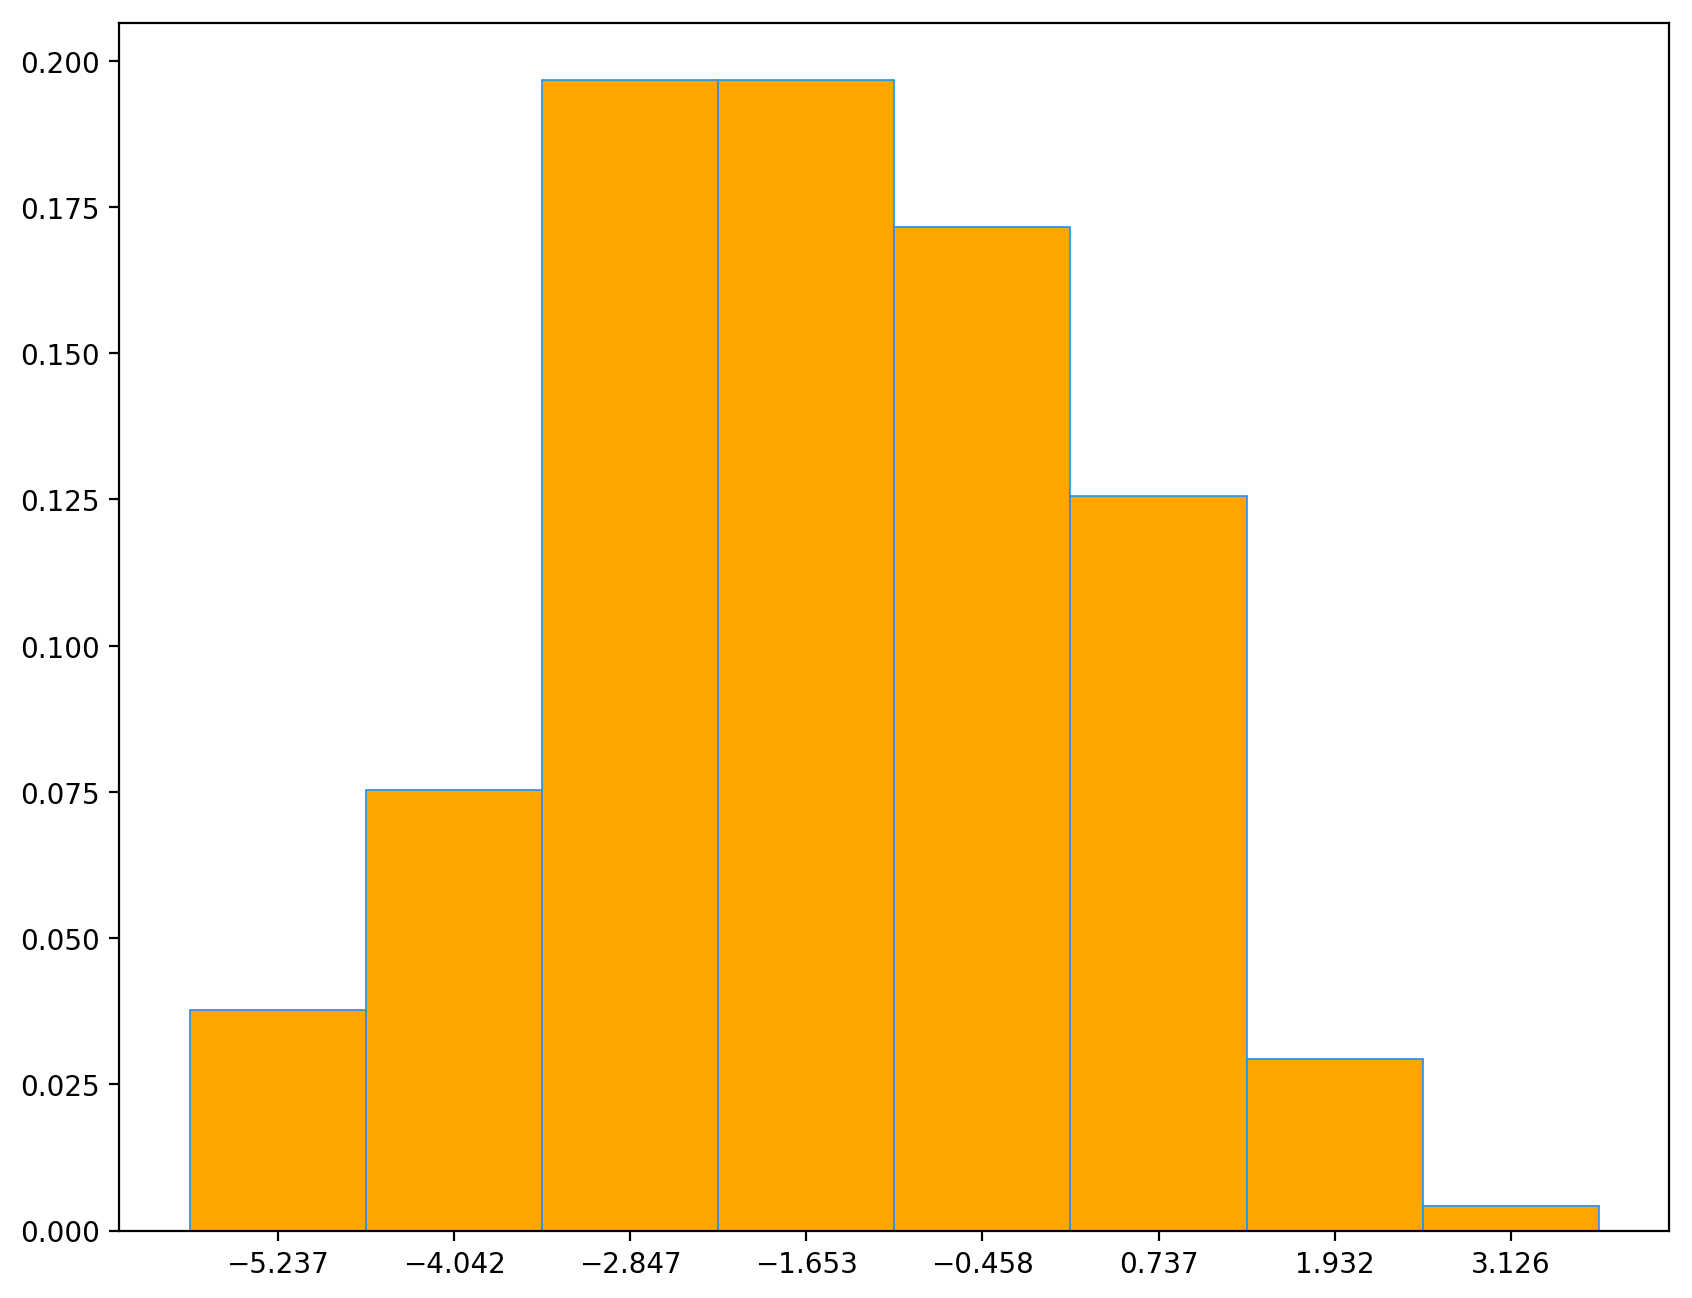

In [33]:
plot_hist(df_normal, len_of_interval_normal)

In [149]:
print_all(df_normal, sort_data_normal[0], len_of_interval_normal)
print()
print_normal_teor()

выборочное среднее = -1.55707
выборочная дисперсия = 2.17951
выборочное среднее квадратическое отклонение = 1.47632
выборочная мода = -2.25001
выборочная медиана = -0.39437
выборочниый момент 2-го порядка = 5.55556
выборочный центральный момент 2-ого порядка = 3.1311
выборочный коэффициент асимметрии = -0.00444
выборочный коэффициент эксцесса = -1.91974

NORMAL teoreric
expected value = -1.5
dispersion = 1.7490062499999994
quadratic deviation = 1.3224999999999998
fashion = -1.5
median = -1.5
asymmetry = 0
kurtosis = 0


In [150]:
normal_teor_values = normal_teor_probability(sort_data_normal, a, sigma, m_Sterdjes, len_of_interval_normal)
print()
for i in range(len(normal_teor_values)):
    print(abs(normal_teor_values[i]-Wk_normal[i]))


1 0.00828
2 0.06191
3 0.21461
4 0.34635
5 0.26078
6 0.0915
7 0.0149
8 0.00112
sum = 0.9994500000000001

0.03672
0.028089999999999997
0.02038999999999999
0.11135
0.055780000000000024
0.058499999999999996
0.020100000000000003
0.00388


# показательное распределение 

In [109]:
# data_exp = exponential(1/lam, size)
# for i in range(size): 
#     data_exp[i] = round(data_exp[i], 5)
# print(list(data_exp))

data_exp = [0.06478, 0.0805, 0.47277, 0.2856, 0.21391, 0.29702, 0.41938, 0.38807, 0.02025, 0.00744,
 0.37624, 0.16009, 0.51127, 0.03776, 0.09479, 1.94518, 0.24865, 0.0899, 0.00688, 0.28609, 
 0.30432, 0.39371, 0.16539, 0.40737, 0.40654, 0.10726, 0.20742, 0.4097, 0.38087, 0.49031, 
 0.11724, 0.90698, 1.16606, 0.71847, 0.03902, 0.3631, 0.3121, 0.16673, 0.52622, 0.49555, 
 0.49164, 0.714, 0.3829, 0.18736, 0.059, 1.14758, 0.30593, 0.01512, 0.63264, 0.1006, 
 1.07828, 0.85593, 0.03462, 0.07844, 0.65795, 0.7771, 0.1938, 0.29429, 0.00559, 0.10353,
 0.05745, 0.01407, 0.74513, 0.0275, 0.64167, 0.69627, 0.20344, 0.18536, 0.01941, 0.14528,
 0.31, 0.09946, 0.13164, 0.03624, 0.6076, 0.00263, 0.27706, 0.18708, 0.57342, 0.9322, 
 0.34903, 0.19833, 0.23167, 0.05974, 0.32255, 0.60119, 0.18743, 0.33066, 0.68373, 0.24904,
 0.15978, 0.02259, 0.34784, 0.02115, 0.14699, 0.51034, 0.5407, 0.0784, 0.24316, 0.21541,
 0.11264, 0.1715, 0.18719, 0.23529, 0.45881, 0.07007, 0.25074, 0.56781, 0.30803, 0.95646,
 0.21363, 0.12606, 0.1258, 0.13642, 0.66989, 0.61823, 0.60302, 0.17047, 0.67091, 0.15276, 
 0.13246, 0.01983, 0.9179, 0.19317, 0.248, 0.05001, 0.10887, 0.00437, 0.05545, 0.21381,
 0.0263, 0.53392, 0.12011, 0.53216, 0.31692, 0.2246, 1.34521, 0.14456, 0.19797, 0.22201,
 0.3885, 0.42889, 0.3831, 0.8627, 0.35082, 0.44121, 0.4917, 1.07766, 1.61165, 1.36892, 
 0.14539, 0.07405, 0.37556, 0.48274, 0.38384, 0.31865, 0.00294, 0.16553, 0.2942, 0.48693, 
 1.03319, 0.24618, 0.08273, 0.15577, 0.97195, 0.15193, 0.0976, 0.05463, 0.10186, 0.08055, 
 1.04496, 1.04292, 0.15796, 0.33002, 0.78859, 0.07389, 0.30146, 0.62293, 0.068, 0.34017,
 0.04832, 0.31765, 0.21355, 0.06148, 0.16026, 0.23271, 0.73297, 0.23003, 0.09353, 0.25247,
 0.17974, 0.04044, 0.08438, 0.11937, 0.09273, 0.32843, 0.65551, 0.22847, 0.19335, 0.07031]


In [134]:
sort_data_exp = sorted(data_exp)
for i in range(0,len(sort_data_exp),10):
    print(sort_data_exp[i], sort_data_exp[i+1], 
          sort_data_exp[i+2], sort_data_exp[i+3], 
          sort_data_exp[i+4], sort_data_exp[i+5], 
          sort_data_exp[i+6], sort_data_exp[i+7], 
          sort_data_exp[i+8], sort_data_exp[i+9])

0.00263 0.00294 0.00437 0.00559 0.00688 0.00744 0.01407 0.01512 0.01941 0.01983
0.02025 0.02115 0.02259 0.0263 0.0275 0.03462 0.03624 0.03776 0.03902 0.04044
0.04832 0.05001 0.05463 0.05545 0.05745 0.059 0.05974 0.06148 0.06478 0.068
0.07007 0.07031 0.07389 0.07405 0.0784 0.07844 0.0805 0.08055 0.08273 0.08438
0.0899 0.09273 0.09353 0.09479 0.0976 0.09946 0.1006 0.10186 0.10353 0.10726
0.10887 0.11264 0.11724 0.11937 0.12011 0.1258 0.12606 0.13164 0.13246 0.13642
0.14456 0.14528 0.14539 0.14699 0.15193 0.15276 0.15577 0.15796 0.15978 0.16009
0.16026 0.16539 0.16553 0.16673 0.17047 0.1715 0.17974 0.18536 0.18708 0.18719
0.18736 0.18743 0.19317 0.19335 0.1938 0.19797 0.19833 0.20344 0.20742 0.21355
0.21363 0.21381 0.21391 0.21541 0.22201 0.2246 0.22847 0.23003 0.23167 0.23271
0.23529 0.24316 0.24618 0.248 0.24865 0.24904 0.25074 0.25247 0.27706 0.2856
0.28609 0.2942 0.29429 0.29702 0.30146 0.30432 0.30593 0.30803 0.31 0.3121
0.31692 0.31765 0.31865 0.32255 0.32843 0.33002 0.33066 0.34017

In [111]:
len_of_interval_exp = len_of_interval_i(sort_data_exp, m_Sterdjes)
print('d =', len_of_interval_exp)

d = 0.24282


In [112]:
elems_exp = make_elems_in_intervals(sort_data_exp, len_of_interval_exp)
for i in range(len(elems_exp)):
    print(elems_exp[i])

0.00263 0.24545
0.24545 0.48827000000000004
0.48827000000000004 0.73109
0.73109 0.97391
0.97391 1.2167299999999999
1.2167299999999999 1.45955
1.45955 1.70237
1.70237 1.94519
[0.00263, 0.00294, 0.00437, 0.00559, 0.00688, 0.00744, 0.01407, 0.01512, 0.01941, 0.01983, 0.02025, 0.02115, 0.02259, 0.0263, 0.0275, 0.03462, 0.03624, 0.03776, 0.03902, 0.04044, 0.04832, 0.05001, 0.05463, 0.05545, 0.05745, 0.059, 0.05974, 0.06148, 0.06478, 0.068, 0.07007, 0.07031, 0.07389, 0.07405, 0.0784, 0.07844, 0.0805, 0.08055, 0.08273, 0.08438, 0.0899, 0.09273, 0.09353, 0.09479, 0.0976, 0.09946, 0.1006, 0.10186, 0.10353, 0.10726, 0.10887, 0.11264, 0.11724, 0.11937, 0.12011, 0.1258, 0.12606, 0.13164, 0.13246, 0.13642, 0.14456, 0.14528, 0.14539, 0.14699, 0.15193, 0.15276, 0.15577, 0.15796, 0.15978, 0.16009, 0.16026, 0.16539, 0.16553, 0.16673, 0.17047, 0.1715, 0.17974, 0.18536, 0.18708, 0.18719, 0.18736, 0.18743, 0.19317, 0.19335, 0.1938, 0.19797, 0.19833, 0.20344, 0.20742, 0.21355, 0.21363, 0.21381, 0.21391, 0.

In [113]:
Nk_exp = count_elems(elems_exp)
Nk_exp

[102, 49, 27, 11, 7, 2, 1, 1]

In [114]:
Wk_exp = relative_frequency(Nk_exp, size)
Wk_exp

[0.51, 0.245, 0.135, 0.055, 0.035, 0.01, 0.005, 0.005]

In [115]:
Xk_exp = intervals_mid(sort_data_exp, len_of_interval_exp)
Xk_exp

[0.12404,
 0.36686,
 0.60968,
 0.8525,
 1.09532,
 1.3381399999999999,
 1.58096,
 1.82378]

In [116]:
df_exp = df_create(Xk_exp, Nk_exp, Wk_exp)
df_exp

,Xk,Nk,Wk
0,0.12404,102,0.510
1,0.36686,49,0.245
2,0.60968,27,0.135
3,0.85250,11,0.055
4,1.09532,7,0.035
5,1.33814,2,0.010
6,1.58096,1,0.005
7,1.82378,1,0.005


In [117]:
summ = 0
for i in range(len(df_exp)):
    summ = summ + df_exp['Wk'][i]
summ

1.0

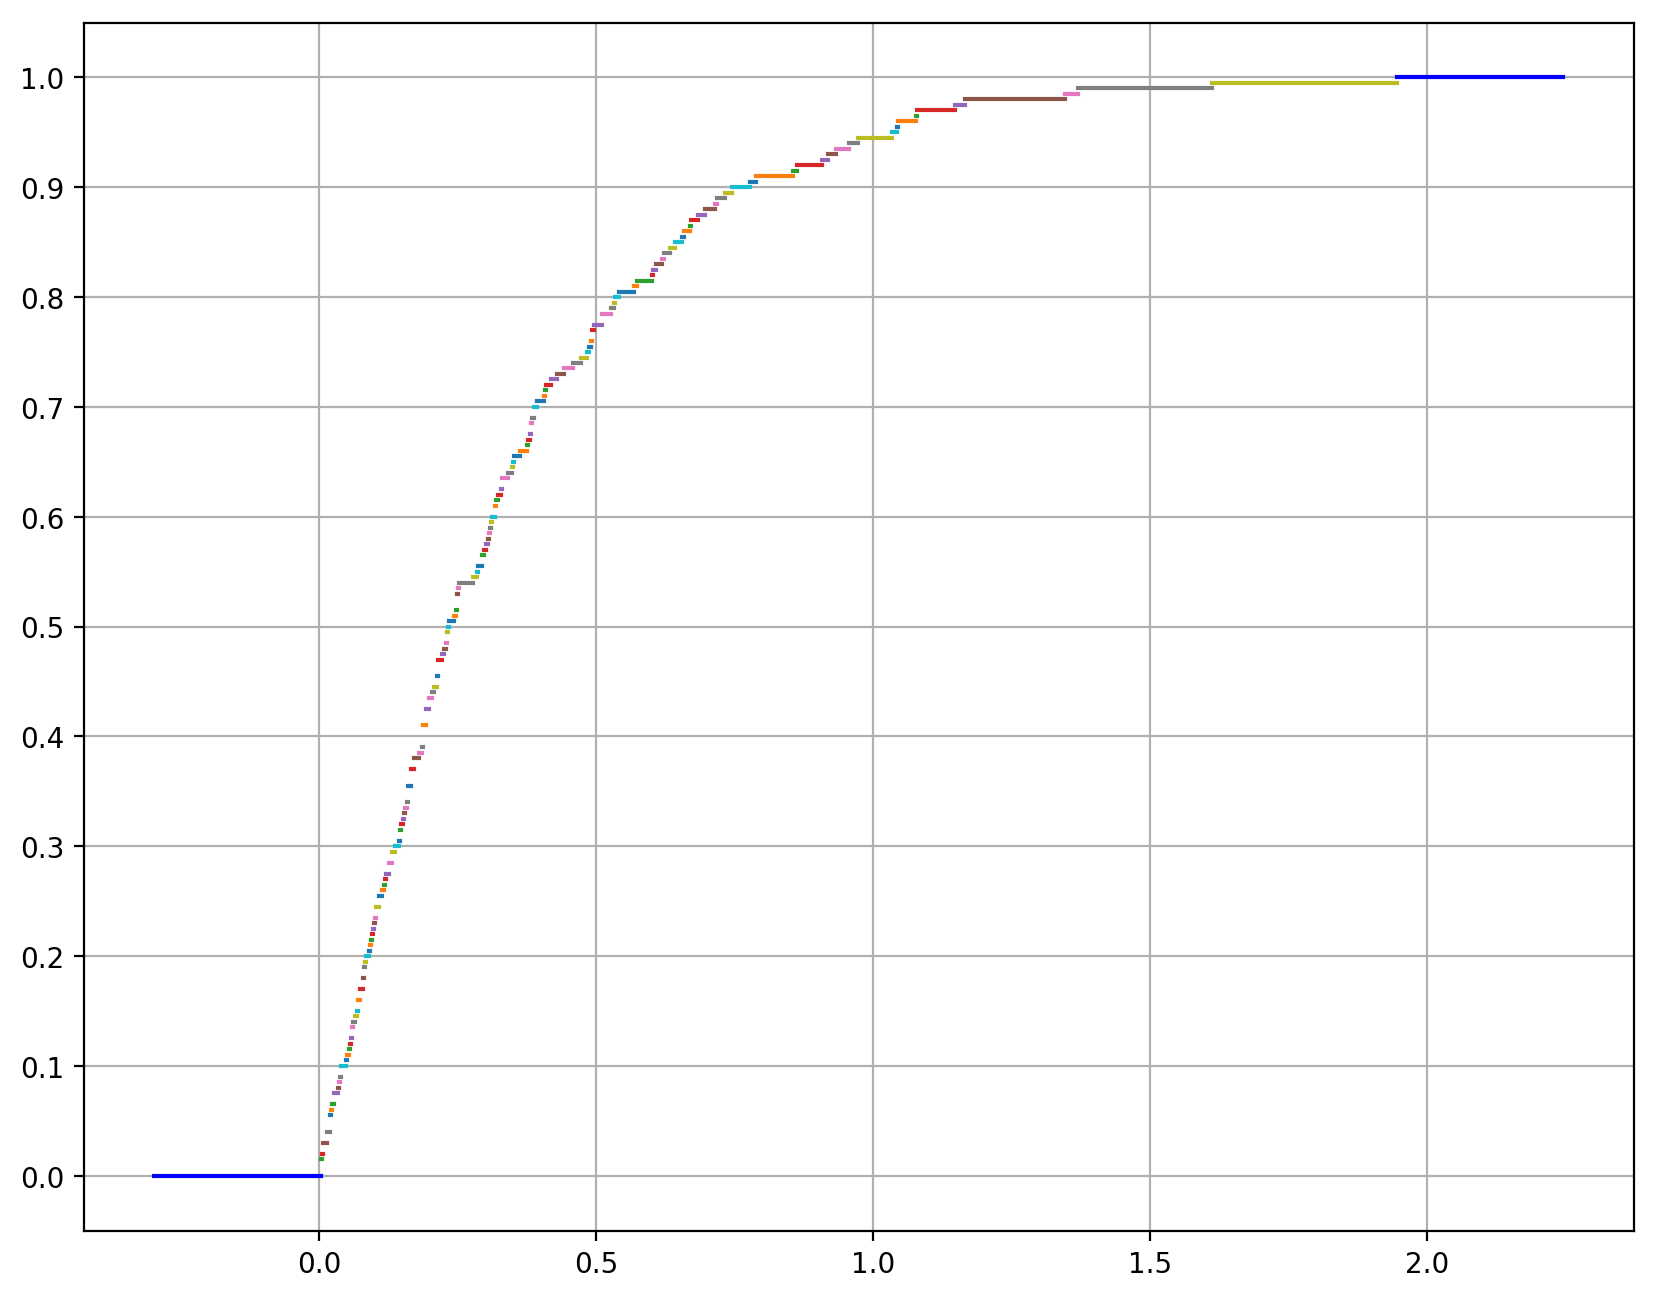

In [118]:
plot_emperic(sort_data_exp, size)

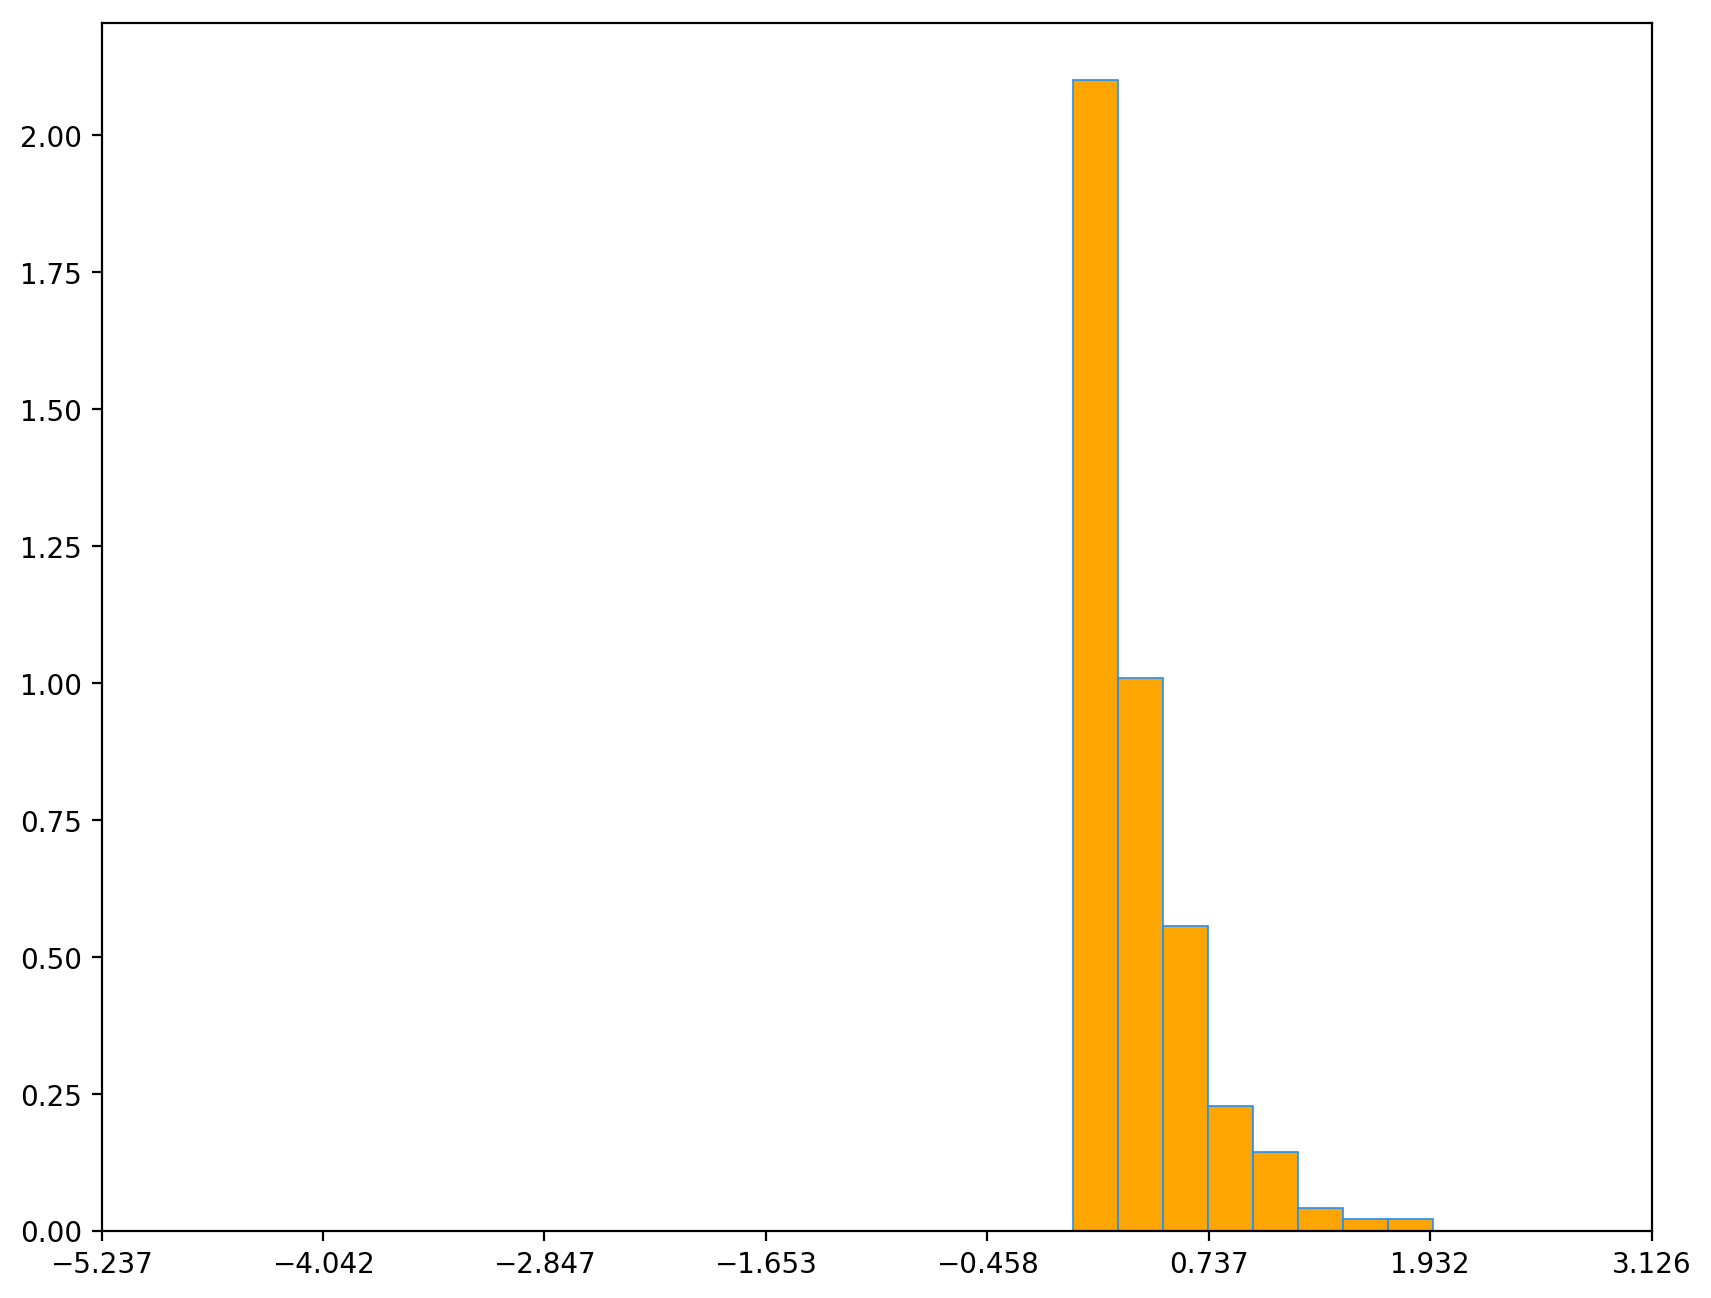

In [119]:
plot_hist(df_exp, len_of_interval_exp)

In [133]:
print_all(df_exp, sort_data_exp[0], len_of_interval_exp)
print()
print_exp_teor()

выборочное среднее = 0.35108
выборочная дисперсия = 0.05743
выборочное среднее квадратическое отклонение = 0.23966
выборочная мода = 0.16242
выборочная медиана = 0.48351
выборочниый момент 2-го порядка = 0.22
выборочный центральный момент 2-ого порядка = 0.09674
выборочный коэффициент асимметрии = 277.7211
выборочный коэффициент эксцесса = 5568.25977

EXPONENTIAL teoreric
expected value = 0.3508771929824561
dispersion = 0.12311480455524776
quadratic deviation = 0.3508771929824561
fashion = 0
median = 0.24320953703857728
asymmetry = 2
kurtosis = 6


In [157]:
exp_teor_values = exp_teor_probability(sort_data_exp, lam, m_Sterdjes, len_of_interval_exp)
print()
for i in range(len(exp_teor_values)):
    print(round(abs(exp_teor_values[i]-Wk_exp[i]), 5))


1 0.49572
2 0.24813
3 0.1242
4 0.06217
5 0.03112
6 0.01558
7 0.0078
8 0.0039
sum = 0.9886200000000002

0.01428
0.00313
0.0108
0.00717
0.00388
0.00558
0.0028
0.0011


# равномерное распределение

In [60]:
# data_uni = stats.uniform.rvs(a_uni, b, size)
# for i in range(size): 
#     data_uni[i] = round(data_uni[i], 5)
# print(list(data_uni))

data_uni = [0.79857, 0.63119, 1.11028, 0.49508, 0.0196, 1.21199, -0.31139, 0.91481, -0.07069, 1.11327, 
 0.1838, -0.61877, 1.45916, 1.10436, 0.79666, 0.07559, 0.04654, -0.04947, -0.60359, 1.12611,
 1.2798, 0.17039, 1.30784, 0.908, 1.28977, -0.4696, 0.59497, -0.24997, 0.13608, -0.33474, 
 1.24208, -0.59398, 0.98557, 1.34538, 1.23372, 0.59462, -0.62703, 0.73473, -0.37247, -0.02931,
 -0.23712, -0.2123, 1.172, 1.225, -0.44118, -0.24695, 0.69363, 0.75339, -0.63587, -0.17446,
 0.69202, -0.1849, 1.26135, -0.06643, 0.71435, 1.00262, 0.36123, -0.14304, -0.15809, 1.39059,
 0.09395, -0.28084, -0.0854, -0.37128, 0.39609, 0.70435, 0.88573, -0.48797, 1.32619, 1.21419, 
 0.26612, 0.25236, -0.38785, 0.53978, -0.73412, 1.28364, -0.66781, 0.24795, 0.59922, 0.90932,
 0.46501, 1.15281, -0.2764, 0.61547, 0.6933, 1.30457, -0.38725, 0.65644, 0.35483, 1.45713,
 -0.52343, -0.53374, 0.3719, 0.12529, -0.09714, 1.10538, -0.67559, 0.70414, 1.22534, -0.43454,
 -0.74165, -0.23871, -0.02724, 0.27862, -0.19515, -0.48068, -0.69666, -0.06046, 0.52197, 0.50662,
 0.23091, 0.50584, -0.42084, 0.79946, -0.41291, -0.49299, -0.35679, 0.66341, 0.08443, 0.96233, 
 0.53517, 0.5489, 1.28762, 1.08523, -0.53732, 0.07347, -0.36627, -0.7344, 1.36368, 0.33733, 
 0.52395, 1.00616, 0.73507, 1.49856, 0.28063, -0.20898, 0.86723, 1.46942, 1.49872, 1.09281, 
 1.27516, -0.70251, 0.82517, -0.0323, 0.05043, 0.78046, 0.1158, -0.44886, 0.03757, -0.06252,
 0.55887, 1.32544, 0.61681, 0.55473, 0.85881, -0.10453, 0.40693, 0.87916, 1.4929, 0.62742,
 1.11576, 0.68011, 1.06215, 0.57598, -0.5352, 0.59045, 0.37905, -0.0068, 1.39286, -0.18833,
 1.37245, 1.24663, 0.19367, 0.28096, -0.07547, 0.40281, -0.63174, -0.62599, 1.20221, 1.2418, 
 0.10156, 1.48304, 0.44274, -0.47081, 1.10085, 1.32008, 1.42725, 0.83613, 0.83002, 0.2903, 
 0.01567, 1.22303, 0.44385, 0.89418, 0.63623, 0.26202, 0.18606, 1.43744, 0.8937, -0.41607]


In [135]:
sort_data_uni = sorted(data_uni)
for i in range(0,len(sort_data_uni),10):
    print(sort_data_uni[i], sort_data_uni[i+1], 
          sort_data_uni[i+2], sort_data_uni[i+3], 
          sort_data_uni[i+4], sort_data_uni[i+5], 
          sort_data_uni[i+6], sort_data_uni[i+7], 
          sort_data_uni[i+8], sort_data_uni[i+9])

-0.74165 -0.7344 -0.73412 -0.70251 -0.69666 -0.67559 -0.66781 -0.63587 -0.63174 -0.62703
-0.62599 -0.61877 -0.60359 -0.59398 -0.53732 -0.5352 -0.53374 -0.52343 -0.49299 -0.48797
-0.48068 -0.47081 -0.4696 -0.44886 -0.44118 -0.43454 -0.42084 -0.41607 -0.41291 -0.38785
-0.38725 -0.37247 -0.37128 -0.36627 -0.35679 -0.33474 -0.31139 -0.28084 -0.2764 -0.24997
-0.24695 -0.23871 -0.23712 -0.2123 -0.20898 -0.19515 -0.18833 -0.1849 -0.17446 -0.15809
-0.14304 -0.10453 -0.09714 -0.0854 -0.07547 -0.07069 -0.06643 -0.06252 -0.06046 -0.04947
-0.0323 -0.02931 -0.02724 -0.0068 0.01567 0.0196 0.03757 0.04654 0.05043 0.07347
0.07559 0.08443 0.09395 0.10156 0.1158 0.12529 0.13608 0.17039 0.1838 0.18606
0.19367 0.23091 0.24795 0.25236 0.26202 0.26612 0.27862 0.28063 0.28096 0.2903
0.33733 0.35483 0.36123 0.3719 0.37905 0.39609 0.40281 0.40693 0.44274 0.44385
0.46501 0.49508 0.50584 0.50662 0.52197 0.52395 0.53517 0.53978 0.5489 0.55473
0.55887 0.57598 0.59045 0.59462 0.59497 0.59922 0.61547 0.61681 0.62742

In [62]:
len_of_interval_uni = len_of_interval_i(sort_data_uni, m_Sterdjes)
print('d =', len_of_interval_uni)

d = 0.28005


In [63]:
elems_uni = make_elems_in_intervals(sort_data_uni, len_of_interval_uni)
for i in range(len(elems_uni)):
    print(elems_uni[i])

-0.74165 -0.4616
-0.4616 -0.18155
-0.18155 0.09850000000000003
0.09850000000000003 0.37855000000000005
0.37855000000000005 0.6586000000000002
0.6586000000000002 0.9386500000000001
0.9386500000000001 1.2187000000000001
1.2187000000000001 1.4987500000000002
[-0.74165, -0.7344, -0.73412, -0.70251, -0.69666, -0.67559, -0.66781, -0.63587, -0.63174, -0.62703, -0.62599, -0.61877, -0.60359, -0.59398, -0.53732, -0.5352, -0.53374, -0.52343, -0.49299, -0.48797, -0.48068, -0.47081, -0.4696]
[-0.44886, -0.44118, -0.43454, -0.42084, -0.41607, -0.41291, -0.38785, -0.38725, -0.37247, -0.37128, -0.36627, -0.35679, -0.33474, -0.31139, -0.28084, -0.2764, -0.24997, -0.24695, -0.23871, -0.23712, -0.2123, -0.20898, -0.19515, -0.18833, -0.1849]
[-0.17446, -0.15809, -0.14304, -0.10453, -0.09714, -0.0854, -0.07547, -0.07069, -0.06643, -0.06252, -0.06046, -0.04947, -0.0323, -0.02931, -0.02724, -0.0068, 0.01567, 0.0196, 0.03757, 0.04654, 0.05043, 0.07347, 0.07559, 0.08443, 0.09395]
[0.10156, 0.1158, 0.12529, 0.1

In [64]:
Nk_uni = count_elems(elems_uni)
Nk_uni

[23, 25, 25, 21, 28, 27, 19, 32]

In [65]:
Wk_uni = relative_frequency(Nk_uni, size)
Wk_uni

[0.115, 0.125, 0.125, 0.105, 0.14, 0.135, 0.095, 0.16]

In [66]:
Xk_uni = intervals_mid(sort_data_uni, len_of_interval_uni)
Xk_uni

[-0.6016250000000001,
 -0.321575,
 -0.04152499999999998,
 0.23852500000000004,
 0.5185750000000001,
 0.7986250000000001,
 1.078675,
 1.3587250000000002]

In [67]:
df_uni = df_create(Xk_uni, Nk_uni, Wk_uni)
df_uni

,Xk,Nk,Wk
0,-0.601625,23,0.115
1,-0.321575,25,0.125
2,-0.041525,25,0.125
3,0.238525,21,0.105
4,0.518575,28,0.140
5,0.798625,27,0.135
6,1.078675,19,0.095
7,1.358725,32,0.160


In [68]:
summ = 0
for i in range(len(df_uni)):
    summ = summ + df_uni['Wk'][i]
summ

1.0

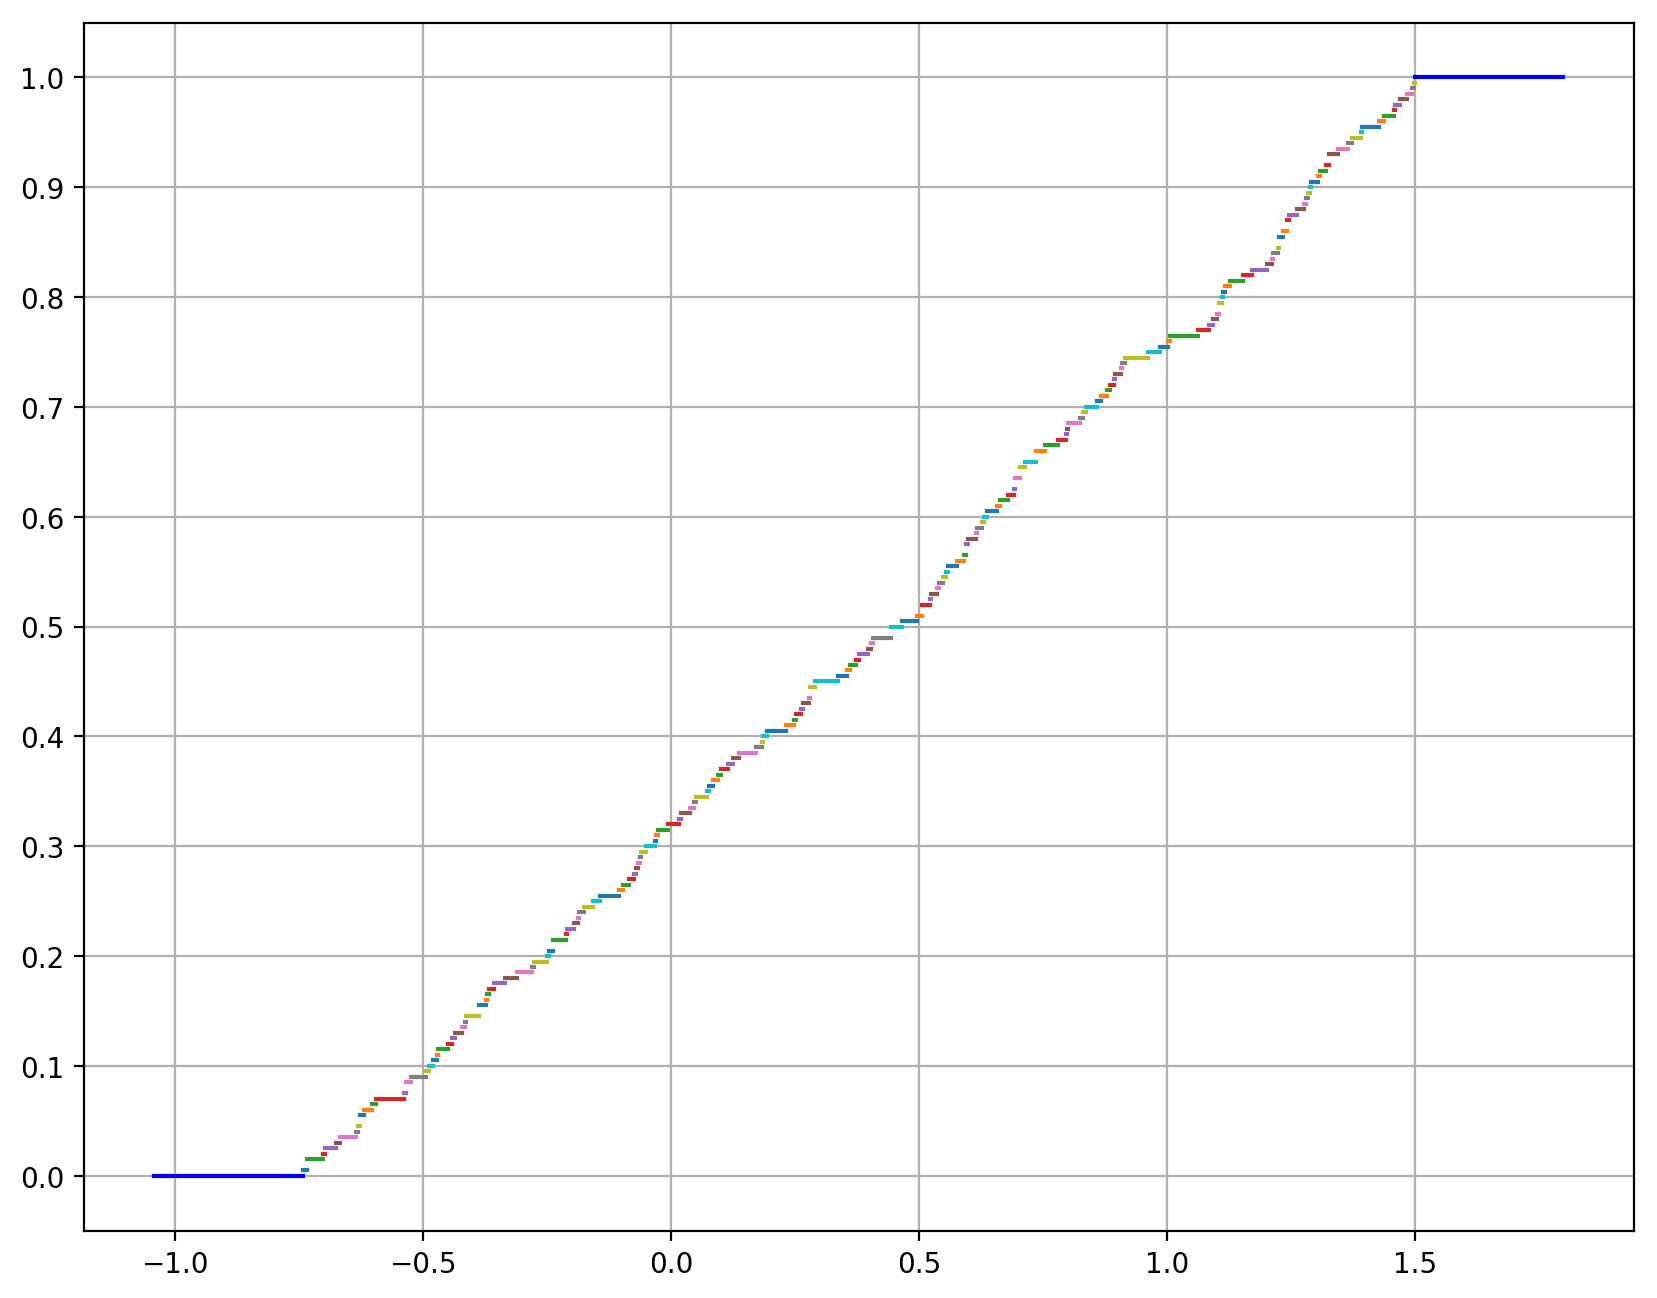

In [69]:
plot_emperic(sort_data_uni, size)

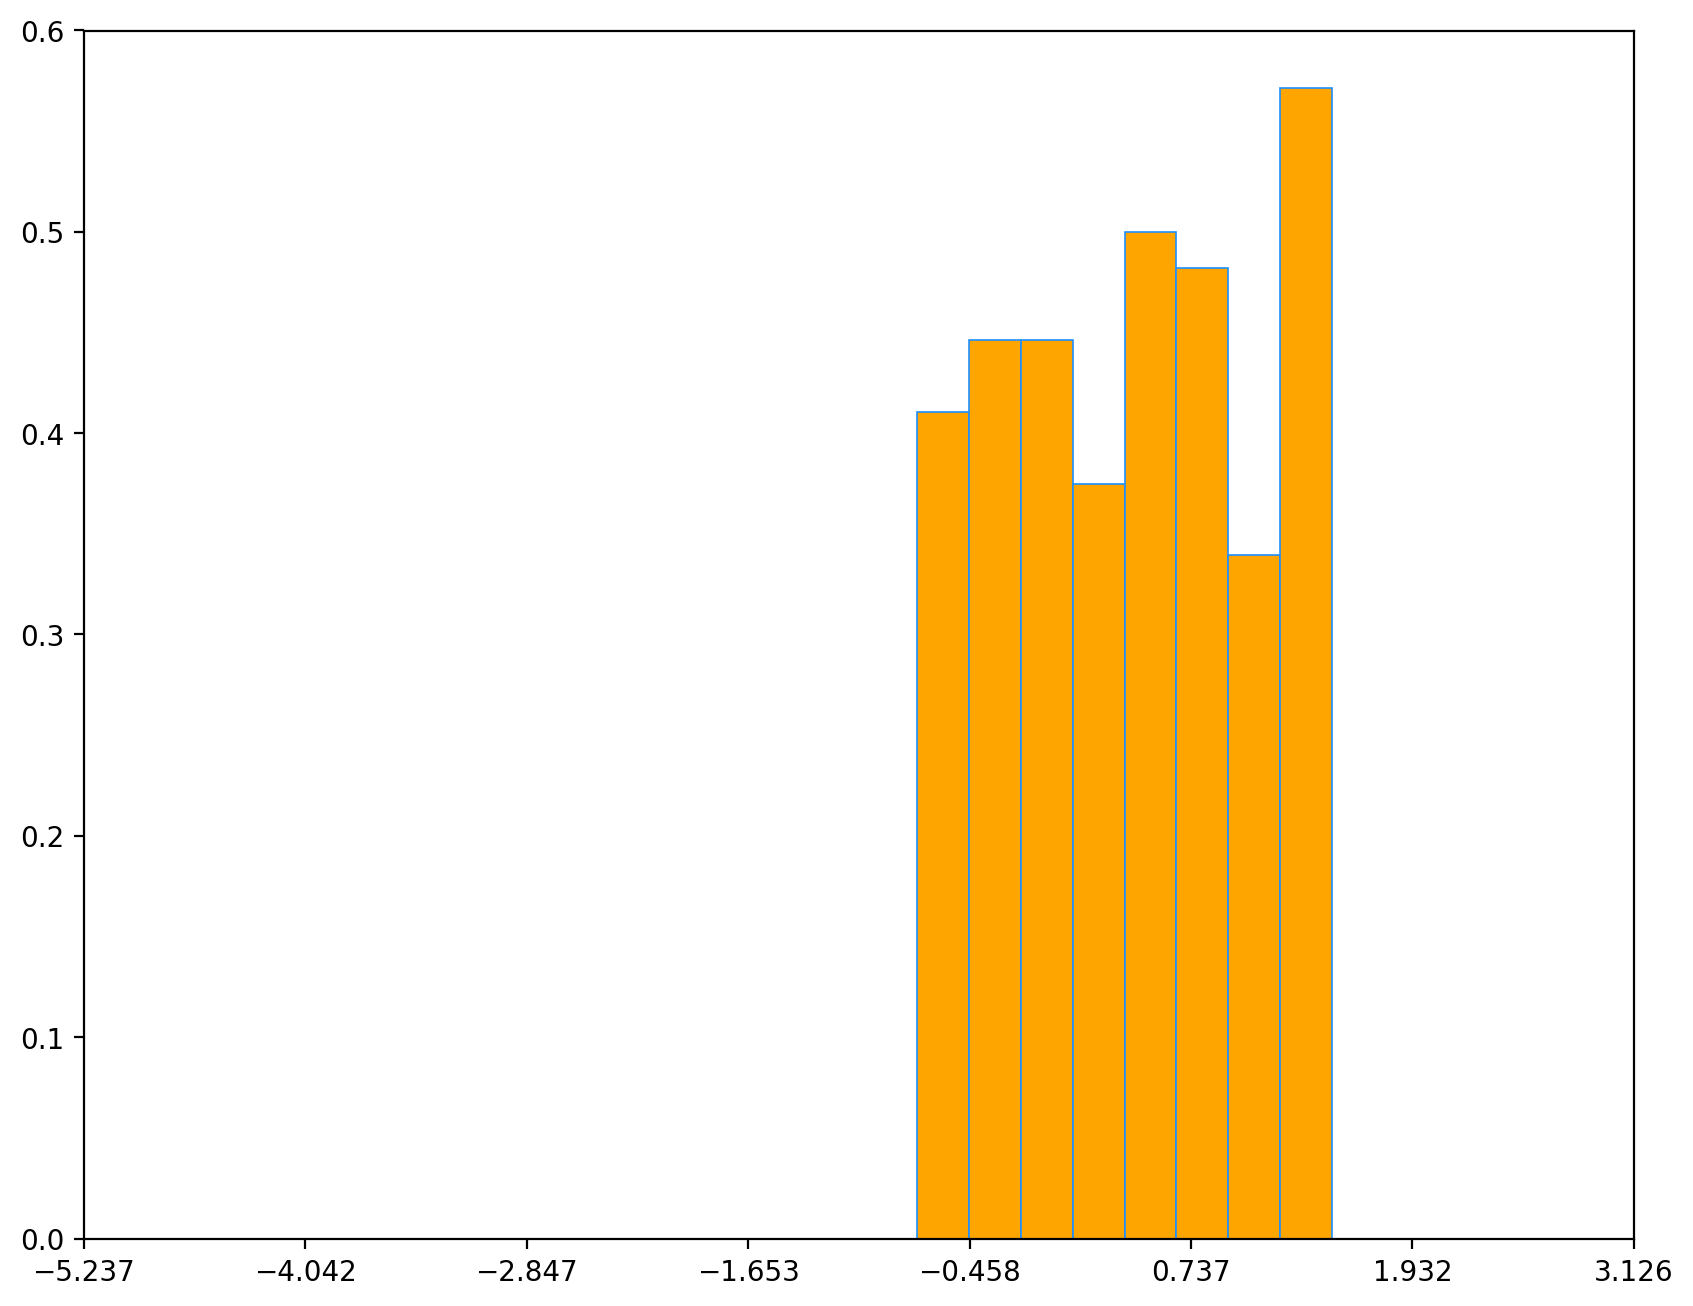

In [70]:
plot_hist(df_uni, len_of_interval_uni)

In [158]:
print_all(df_uni, sort_data_uni[0], len_of_interval_uni)
print()
print_uni_teor()

выборочное среднее = 0.41076
выборочная дисперсия = 0.3694
выборочное среднее квадратическое отклонение = 0.60779
выборочная мода = 1.2996
выборочная медиана = 0.90364
выборочниый момент 2-го порядка = 0.59041
выборочный центральный момент 2-ого порядка = 0.42169
выборочный коэффициент асимметрии = -0.15588
выборочный коэффициент эксцесса = 13.82325

UNIFORM teoreric
expected value = 0.75
dispersion = 0.75
quadratic deviation = 2.598076211353316
fashion = 0.75
median = 0.75
asymmetry = 0
kurtosis = -1.2


In [160]:
uni_teor_values = uni_teor_probability(sort_data_uni, a_uni, b, m_Sterdjes, len_of_interval_uni)
print()
for i in range(len(uni_teor_values)):
    print(round(abs(uni_teor_values[i]-Wk_uni[i]), 5))


1 0.12447
2 0.12447
3 0.12447
4 0.12447
5 0.12447
6 0.12447
7 0.12447
8 0.12447
sum = 0.9957599999999999

0.00947
0.00053
0.00053
0.01947
0.01553
0.01053
0.02947
0.03553
